# Using the `polartoolkit.regions` module

## Display all the pre-defined regions

In [1]:
%%capture
%load_ext autoreload
%autoreload 2
from statistics import mean

from polartoolkit import fetch, maps, regions, utils

In [2]:
# Add all region strings to dictionary
region_dict = regions.get_regions()

# extract antarctic and greenland strings
antarctic_strings = []
for x in list(region_dict.keys()):
    if x == "greenland":
        break
    else:
        antarctic_strings.append(x)

greenland_strings = [x for x in list(region_dict.keys()) if x not in antarctic_strings]

# subset dict for antarctica and greeland
antarctic_regions = {k: region_dict[k] for k in antarctic_strings}
greenland_regions = {k: region_dict[k] for k in greenland_strings}

antarctic_regions, greenland_regions

({'antarctica': (-2800000.0, 2800000.0, -2800000.0, 2800000.0),
  'west_antarctica': (-2740000.0, 570000.0, -2150000.0, 1670000.0),
  'east_antarctica': (-840000.0, 2880000.0, -2400000.0, 2600000.0),
  'antarctic_peninsula': (-2600000.0, -1200000.0, 170000.0, 1800000.0),
  'marie_byrd_land': (-1500000.0, -500000.0, -1350000.0, -800000.0),
  'victoria_land': (100000.0, 1000000.0, -2200000.0, -1000000.0),
  'saunders_coast': (-980000.0, -600000.0, -1350000.0, -1100000.0),
  'roosevelt_island': (-480000.0, -240000.0, -1220000.0, -980000.0),
  'ross_island': (210000.0, 360000.0, -1400000.0, -1250000.0),
  'minna_bluff': (210000.0, 390000.0, -1310000.0, -1120000.0),
  'mcmurdo_dry_valleys': (320000.0, 480000.0, -1400000.0, -1220000.0),
  'siple_coast': (-700000.0, 30000.0, -1110000.0, -450000.0),
  'crary_ice_rise': (-330000.0, -40000.0, -830000.0, -480000.0),
  'siple_dome': (-630000.0, -270000.0, -970000.0, -630000.0),
  'ross_ice_shelf': (-680000.0, 470000.0, -1420000.0, -310000.0),
  'n

Remove a few regions to help with plotting

In [3]:
%%capture
remove = ["antarctica", "west_antarctica", "east_antarctica"]
[antarctic_regions.pop(key, None) for key in remove]

remove = ["greenland"]
[greenland_regions.pop(key, None) for key in remove]

Plot the remaining regions

Warning 1: The definition of geographic CRS EPSG:4326 got from GeoTIFF keys is not the same as the one from the EPSG registry, which may cause issues during reprojection operations. Set GTIFF_SRS_SOURCE configuration option to EPSG to use official parameters (overriding the ones from GeoTIFF keys), or to GEOKEYS to use custom values from GeoTIFF keys and drop the EPSG code.
Warning 1: The definition of geographic CRS EPSG:4326 got from GeoTIFF keys is not the same as the one from the EPSG registry, which may cause issues during reprojection operations. Set GTIFF_SRS_SOURCE configuration option to EPSG to use official parameters (overriding the ones from GeoTIFF keys), or to GEOKEYS to use custom values from GeoTIFF keys and drop the EPSG code.
Warning 1: The definition of geographic CRS EPSG:4326 got from GeoTIFF keys is not the same as the one from the EPSG registry, which may cause issues during reprojection operations. Set GTIFF_SRS_SOURCE configuration option to EPSG to use officia

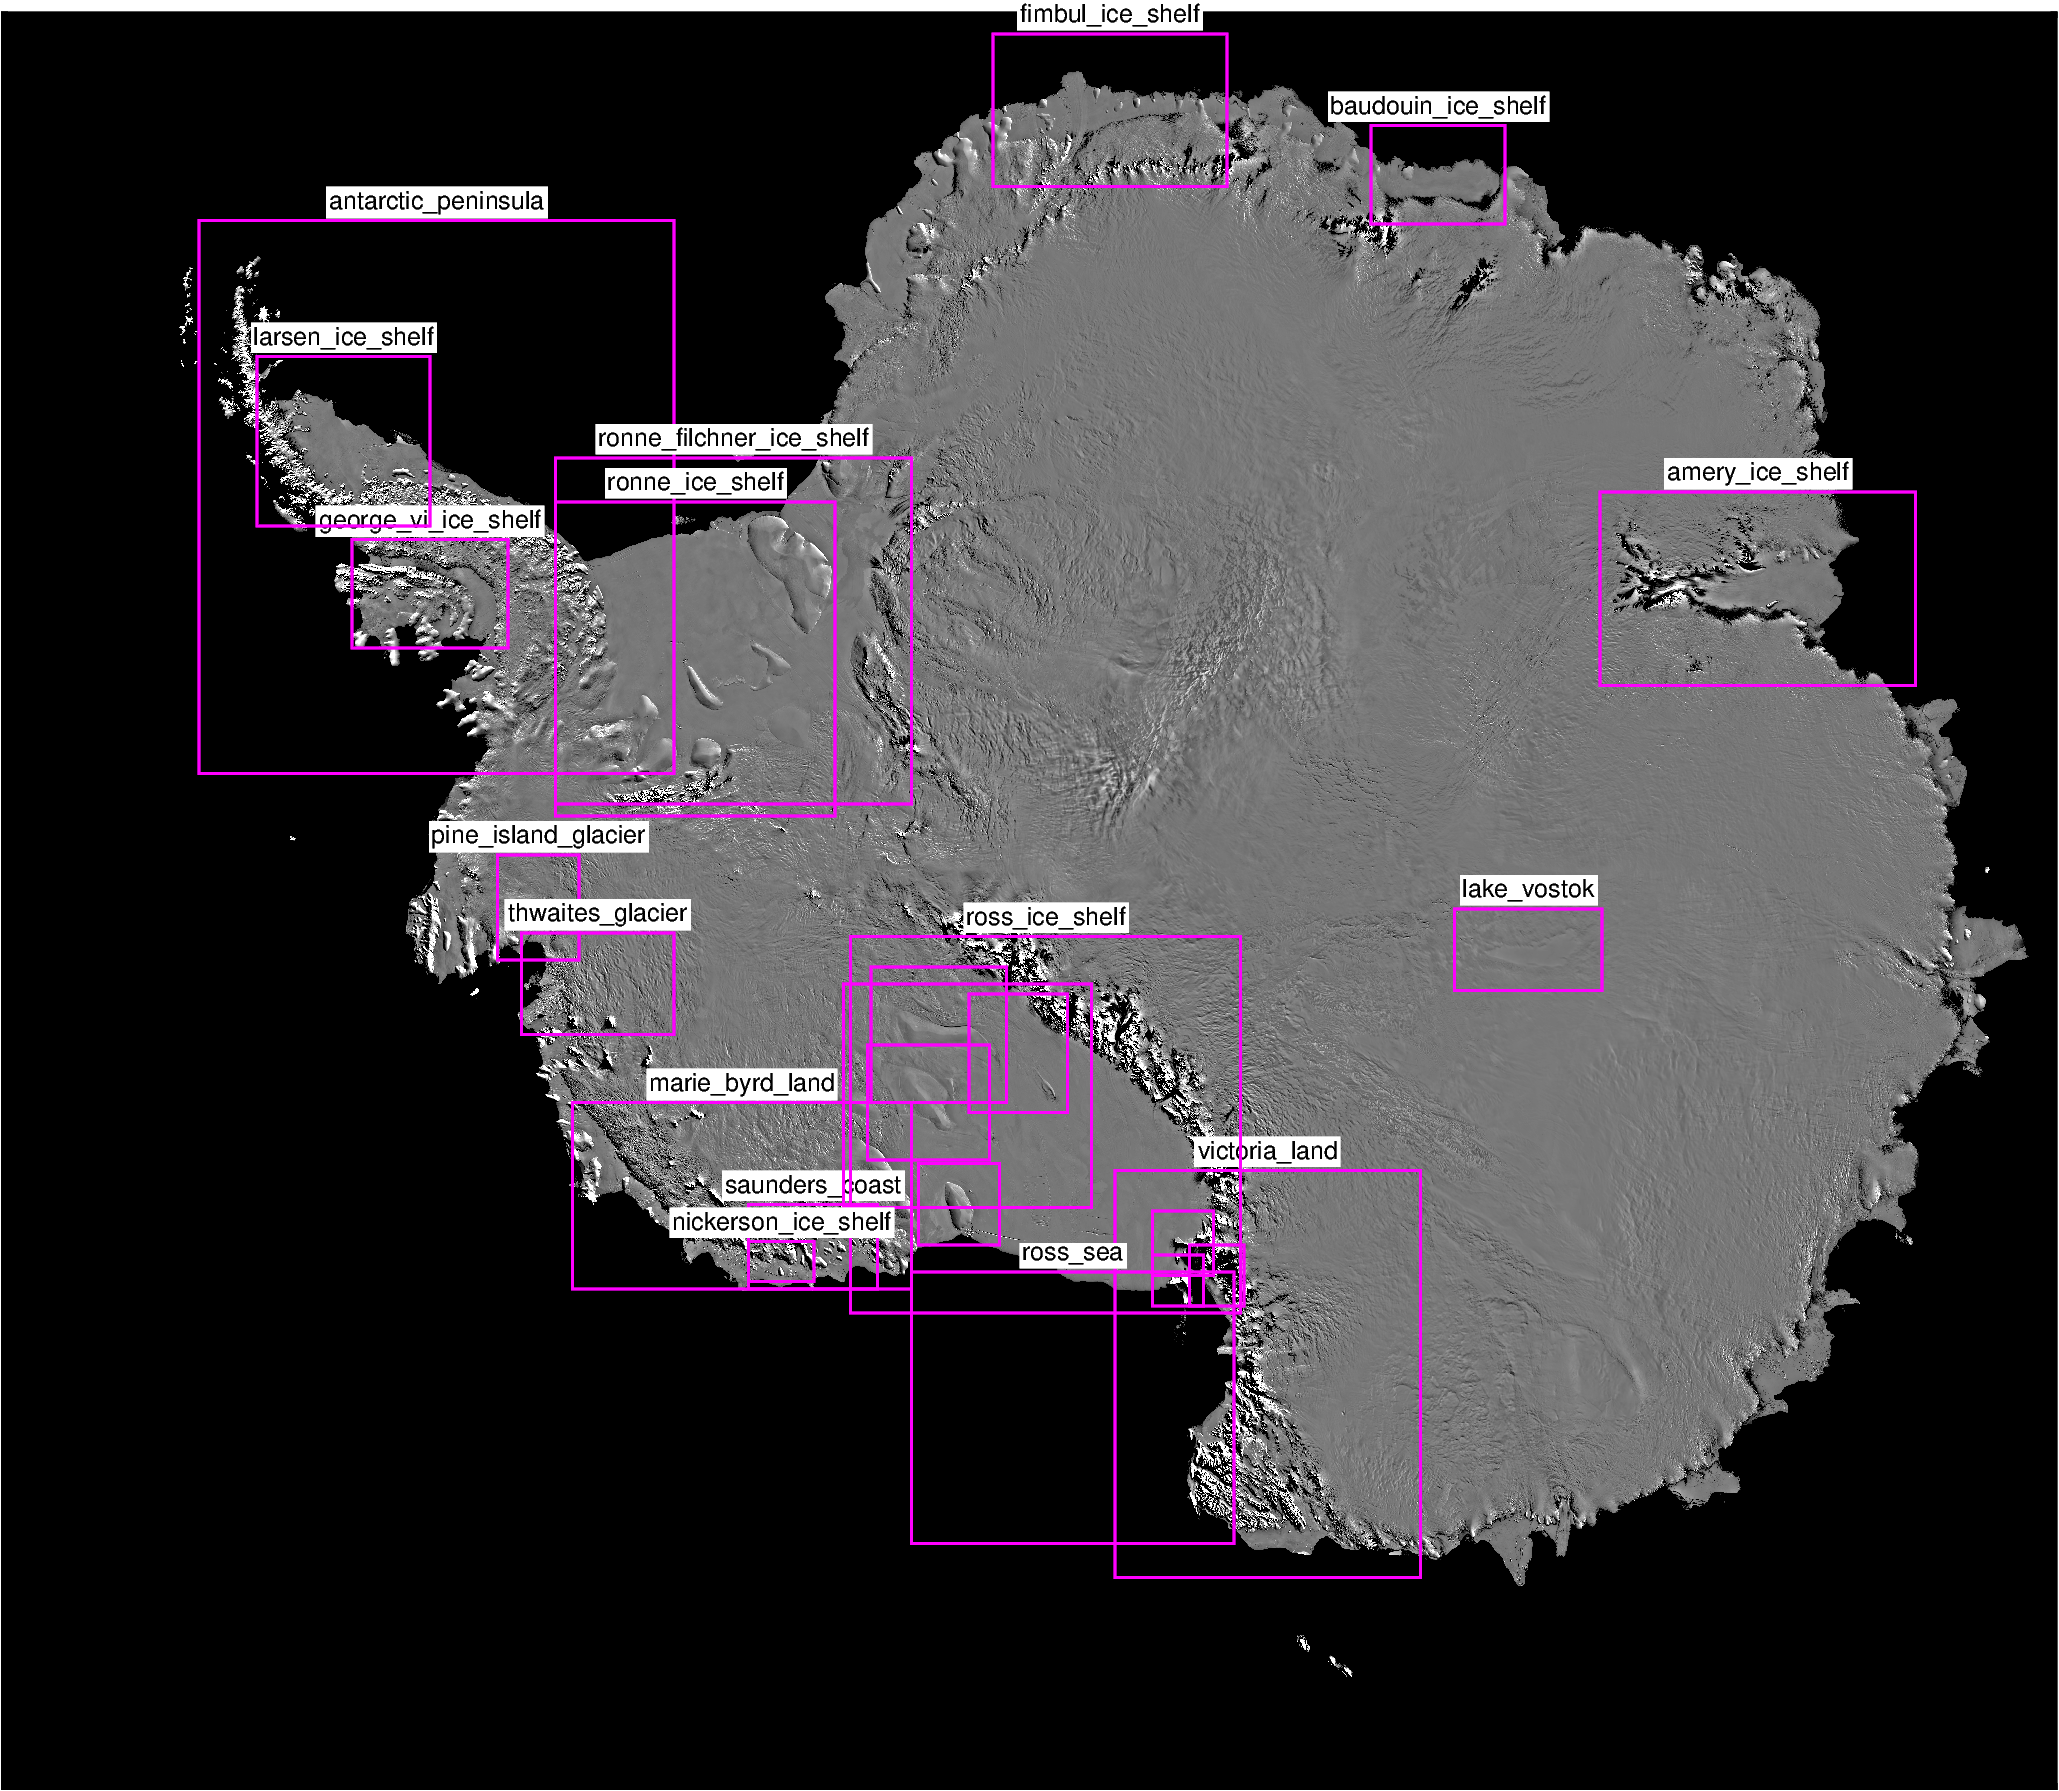

In [4]:
fig = maps.plot_grd(
    grid=fetch.modis_moa(),
    modis=True,
)

for k, v in antarctic_regions.items():
    maps.add_box(fig, v, pen=".6p,magenta")
    if k not in [
        "minna_bluff",
        "mcmurdo_dry_valleys",
        "siple_dome",
        "siple_coast",
        "roosevelt_island",
        "ross_island",
        "crary_ice_rise",
        "kamb_ice_stream",
    ]:
        fig.text(
            x=mean([v[1], v[0]]),
            y=v[3],
            text=k,
            justify="CB",
            offset="0/.1",
            no_clip=True,
            font="6p,Helvetica,black",
            fill="white",
        )

fig.show()

Warning 1: The definition of geographic CRS EPSG:4326 got from GeoTIFF keys is not the same as the one from the EPSG registry, which may cause issues during reprojection operations. Set GTIFF_SRS_SOURCE configuration option to EPSG to use official parameters (overriding the ones from GeoTIFF keys), or to GEOKEYS to use custom values from GeoTIFF keys and drop the EPSG code.
Warning 1: The definition of geographic CRS EPSG:4326 got from GeoTIFF keys is not the same as the one from the EPSG registry, which may cause issues during reprojection operations. Set GTIFF_SRS_SOURCE configuration option to EPSG to use official parameters (overriding the ones from GeoTIFF keys), or to GEOKEYS to use custom values from GeoTIFF keys and drop the EPSG code.
Warning 1: The definition of geographic CRS EPSG:4326 got from GeoTIFF keys is not the same as the one from the EPSG registry, which may cause issues during reprojection operations. Set GTIFF_SRS_SOURCE configuration option to EPSG to use officia

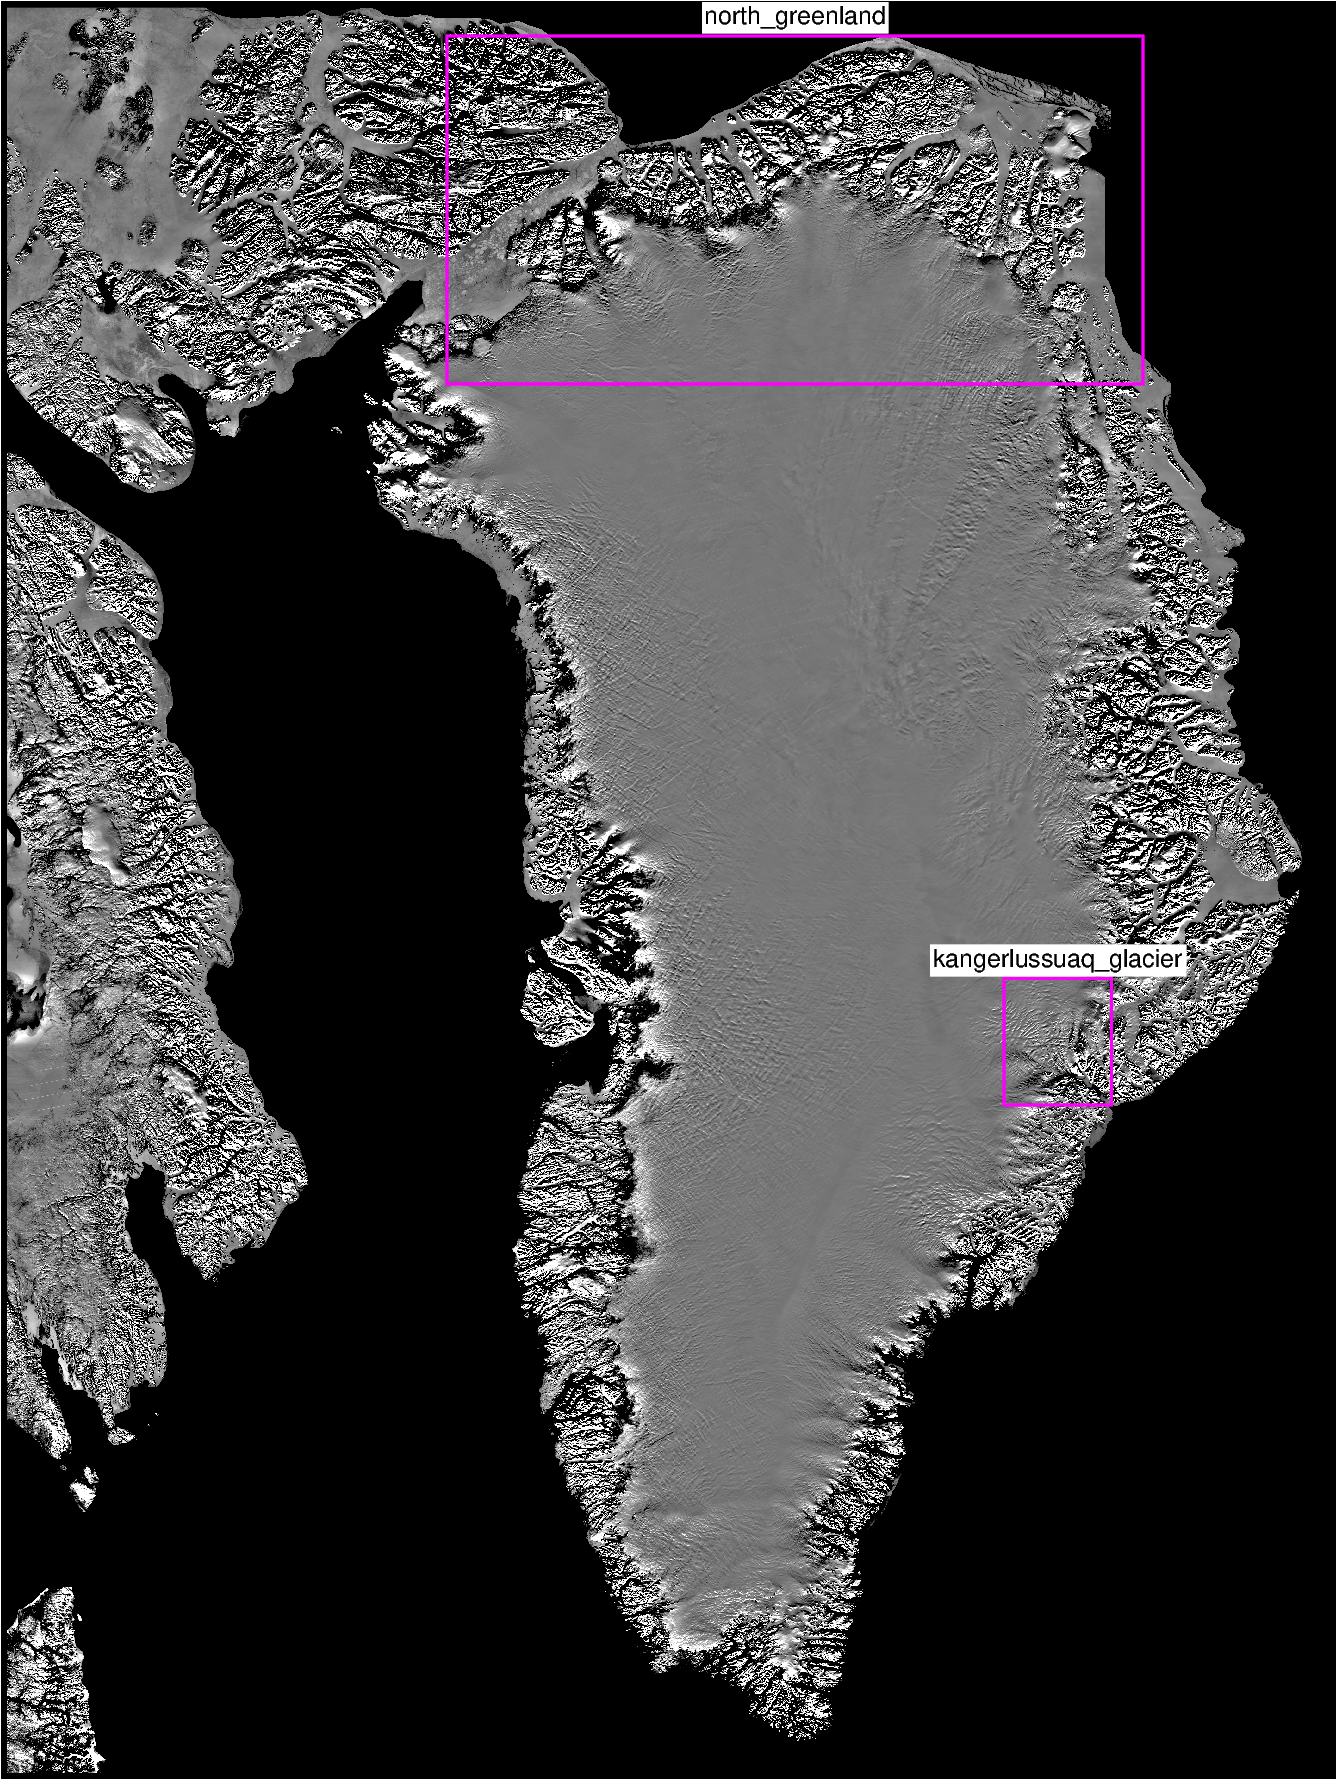

In [5]:
fig = maps.plot_grd(
    grid=fetch.modis_mog(),
    regions=regions.greenland,
    modis=True,
)

for k, v in greenland_regions.items():
    maps.add_box(fig, v, pen=".6p,magenta")
    if k not in []:
        fig.text(
            x=mean([v[1], v[0]]),
            y=v[3],
            text=k,
            justify="CB",
            offset="0/.1",
            no_clip=True,
            font="6p,Helvetica,black",
            fill="white",
        )

fig.show()

## Combining regions

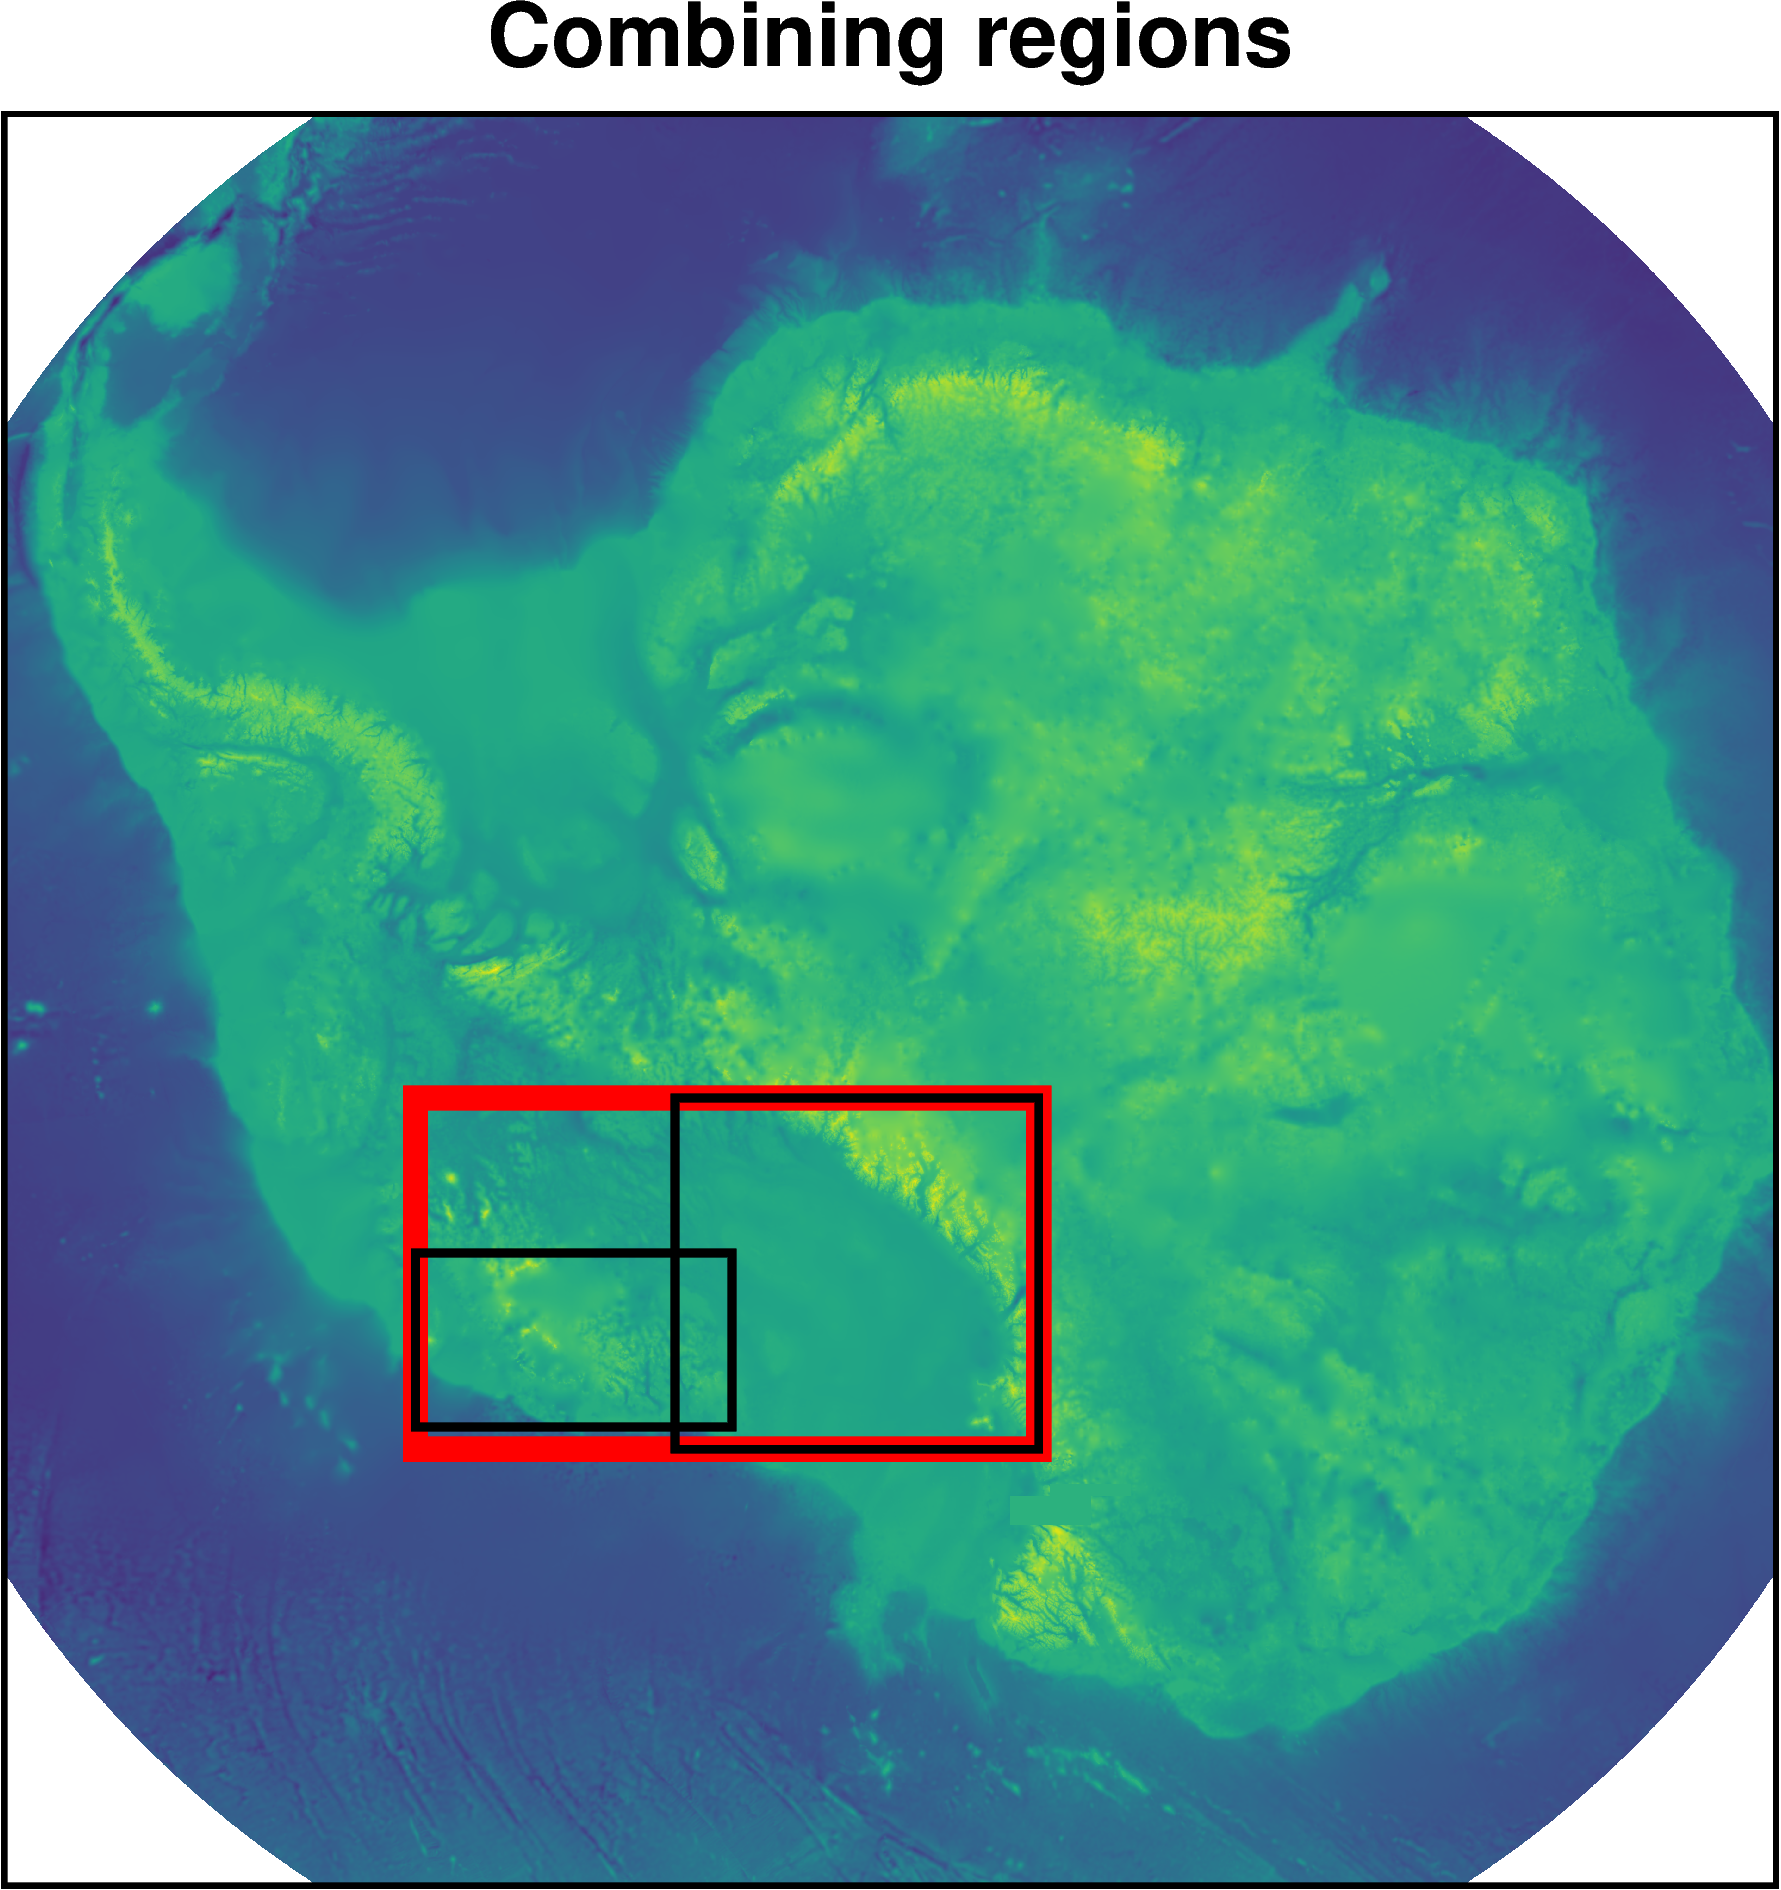

In [6]:
# define two regions
RIS = regions.ross_ice_shelf
MBL = regions.marie_byrd_land

# get the bounding region of both
combined = regions.combine_regions(RIS, MBL)

# make a basemap
fig = maps.plot_grd(
    fetch.bedmap2(layer="bed"),
    region=regions.antarctica,
    colorbar=False,
    title="Combining regions",
)
# plot the three regions
maps.add_box(fig, combined, pen="6p,red")
maps.add_box(fig, RIS)
maps.add_box(fig, MBL)

fig.show()

## Interactively choose a region
This use the package `ipyleaflet`, which isn't install automatically with `polartoolkit`. Install it with `mamba install ipyleaflet`

The below cell will display an interactive map of Antarctica. Drag or zoom to your region of interest and use the `Draw a polygon` button to create a polygon outline the region you want.

In [7]:
polygon = regions.draw_region(hemisphere="south")

Label(value='')

Map(center=[-90, 0], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoom_out_tex…

In [9]:
# get the bounding region of the polygon
region = utils.polygon_to_region(polygon, hemisphere="south")
region

(-1409024.0397683487,
 -991231.9931784446,
 6.470837858001846e-11,
 335872.00078844663)

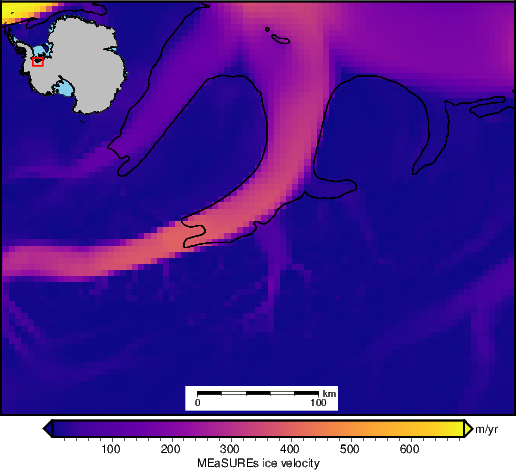

In [11]:
# use it to create a map
maps.plot_grd(
    fetch.ice_vel(region=region, verbose="q"),
    region=region,
    cmap="plasma",
    grd2cpt=True,
    inset=True,
    cbar_label="MEaSUREs ice velocity",
    cbar_unit="m/yr",
    coast=True,
    scalebar=True,
    scalebar_box="+gwhite",
    hemisphere="south",
)